<a href="https://colab.research.google.com/github/vaguiarfinance/Eng_dados_PotatoCore/blob/main/Projeto_Lotofacil_PotatoCore_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto de automação ETL dos dados da Lotofácil.



In [39]:
pip install pandas

In [114]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
# URL direta para o arquivo Excel da Lotofácil
url = "https://dncgroupbr.notion.site/Engenheiro-a-de-Dados-Jr-7c864f99568745d393069004e8954eb3#:~:text=Os%20dados%20da,295.4KB"
response = requests.get(url)

# Verifica se o download foi bem-sucedido
if response.status_code == 200:
    excel_data = BytesIO(response.content)
    df = pd.read_excel('Lotofacil.xlsx')
    print(df.head())

else:
    print("Falha ao baixar o arquivo Excel.")


   Concurso Data Sorteio  Bola1  Bola2  Bola3  Bola4  Bola5  Bola6  Bola7  \
0         1   29/09/2003      2      3      5      6      9     10     11   
1         2   06/10/2003      1      4      5      6      7      9     11   
2         3   13/10/2003      1      4      6      7      8      9     10   
3         4   20/10/2003      1      2      4      5      8     10     12   
4         5   27/10/2003      1      2      4      8      9     11     12   

   Bola8  ...  Rateio 13 acertos  Ganhadores 12 acertos  Rateio 12 acertos  \
0     13  ...            R$10,00                  48807             R$4,00   
1     12  ...            R$10,00                  81252             R$4,00   
2     11  ...            R$10,00                  96244             R$4,00   
3     13  ...            R$10,00                 123912             R$4,00   
4     13  ...            R$10,00                 195636             R$4,00   

   Ganhadores 11 acertos  Rateio 11 acertos  Acumulado 15 acertos  \

In [94]:
# Avaliação dos Types e identificação de a planilha contém todos os campos preenchidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 33 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Concurso                                               2894 non-null   int64 
 1   Data Sorteio                                           2894 non-null   object
 2   Bola1                                                  2894 non-null   int64 
 3   Bola2                                                  2894 non-null   int64 
 4   Bola3                                                  2894 non-null   int64 
 5   Bola4                                                  2894 non-null   int64 
 6   Bola5                                                  2894 non-null   int64 
 7   Bola6                                                  2894 non-null   int64 
 8   Bola7                                                  289

In [95]:
# Para identificar o número de Linhas antes
num_linhas_antes = df.shape[0]
print(f"Número de linhas antes da remoção: {num_linhas_antes}")

Número de linhas antes da remoção: 2894


In [96]:
# Identificar valores duplicados
df[df.duplicated(keep=False)]

,Concurso,Data Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Rateio 13 acertos,Ganhadores 12 acertos,Rateio 12 acertos,Ganhadores 11 acertos,Rateio 11 acertos,Acumulado 15 acertos,Arrecadacao Total,Estimativa Prêmio,Acumulado sorteio especial Lotofácil da Independência,Observação


In [97]:
# Renomear as colunas
df.rename(columns=lambda x: x.strip().replace(' ', '_').lower(), inplace=True)

In [98]:
# Converter colunas do tipo com o indicativo de 'rateio' para float
colunas_rateio = df.columns[df.columns.str.startswith('rateio')]

for coluna in colunas_rateio:
    # Forçar a conversão dos valores para string
    df[coluna] = df[coluna].astype(str)

    # Condição para manter valores zero (0)
    condicao = df[coluna].str.isnumeric() | (df[coluna] == '0')

    # Converter apenas os valores válidos para float
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

    # Preencher NaN (valores ausentes) com zero (0)
    df.loc[~condicao, coluna] = 0

df['data_sorteio'] = pd.to_datetime(df['data_sorteio'], format='%d/%m/%Y')

In [103]:
df.rename(columns={'cidade_/_uf': 'UF'}, inplace=True)

num_linhas_depois = df.shape[0]
print(f"Número de linhas antes da remoção: {num_linhas_depois}")

Número de linhas antes da remoção: 2894


In [102]:
# Preenchendo as células vazias da coluna UF e observação
mensagem_acertadores = "Não há ganhadores dos 15 números"
df['UF'].fillna(mensagem_acertadores, inplace=True)

mensagem_obs = "Não há observações relevantes para este sorteio"
df['observação'].fillna(mensagem_obs, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 33 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   concurso                                               2894 non-null   int64         
 1   data_sorteio                                           2894 non-null   datetime64[ns]
 2   bola1                                                  2894 non-null   int64         
 3   bola2                                                  2894 non-null   int64         
 4   bola3                                                  2894 non-null   int64         
 5   bola4                                                  2894 non-null   int64         
 6   bola5                                                  2894 non-null   int64         
 7   bola6                                                  2894 non-null 

In [148]:
# COnforme observado nas informações acima para selecionar as apenas as colunas das bolas
# será os índices de coluna 2 a 17 já que o último é excludente
colunas_selecionadas = df.iloc[:, 2:17]

# Inicializar um dicionário para armazenar a contagem de frequência de cada número
frequencia_numeros = {}

# Iterar pelas colunas e contar a frequência de cada número
for coluna in colunas_selecionadas.columns:
    contagem = colunas_selecionadas[coluna].value_counts().sort_index().to_dict()

    # Adicionar a contagem de frequência da coluna ao dicionário global
    for numero, frequencia in contagem.items():
        if numero not in frequencia_numeros:
            frequencia_numeros[numero] = 0
        frequencia_numeros[numero] += frequencia

# Organizar os números com base na frequência (do mais frequente para o menos frequente)
numeros_ordenados = sorted(frequencia_numeros.items(), key=lambda x: x[1], reverse=True)

# Exibir os números organizados
for numero, frequencia in numeros_ordenados:
    print(f'Número {numero}: {frequencia} vezes')

Número 20: 1813 vezes
Número 10: 1802 vezes
Número 11: 1789 vezes
Número 25: 1784 vezes
Número 13: 1769 vezes
Número 14: 1760 vezes
Número 24: 1760 vezes
Número 5: 1749 vezes
Número 3: 1748 vezes
Número 12: 1742 vezes
Número 4: 1739 vezes
Número 22: 1738 vezes
Número 1: 1734 vezes
Número 9: 1734 vezes
Número 2: 1731 vezes
Número 19: 1728 vezes
Número 18: 1725 vezes
Número 21: 1721 vezes
Número 15: 1717 vezes
Número 17: 1706 vezes
Número 7: 1700 vezes
Número 23: 1700 vezes
Número 6: 1686 vezes
Número 8: 1672 vezes
Número 16: 1663 vezes


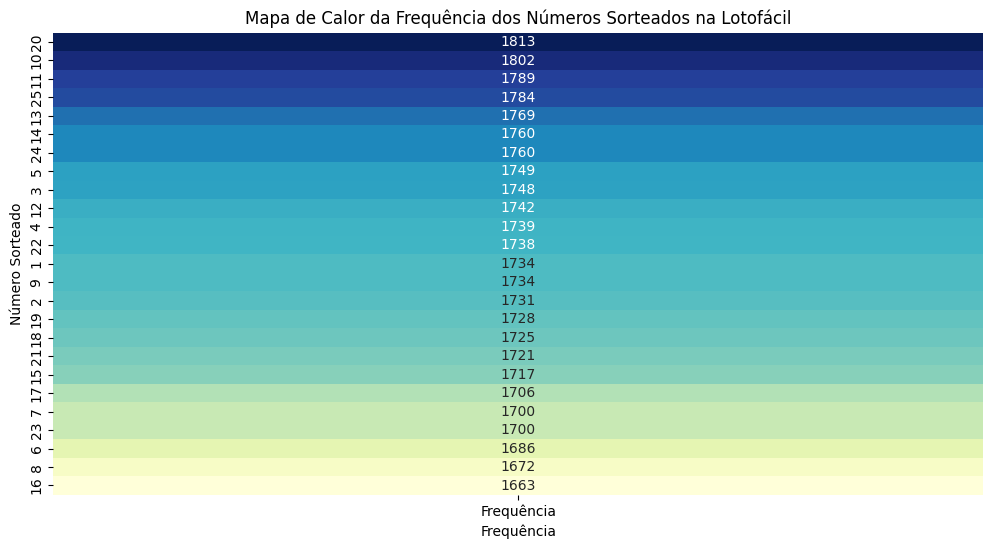

In [149]:
# Converter a lista de frequência em um DataFrame
df_frequencia = pd.DataFrame(numeros_ordenados, columns=['Número', 'Frequência'])

# Redimensionar o DataFrame para que os números sejam o índice
df_frequencia.set_index('Número', inplace=True)

# Criar um mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(df_frequencia, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.xlabel('Frequência')
plt.ylabel('Número Sorteado')
plt.title('Mapa de Calor da Frequência dos Números Sorteados na Lotofácil')
plt.show()

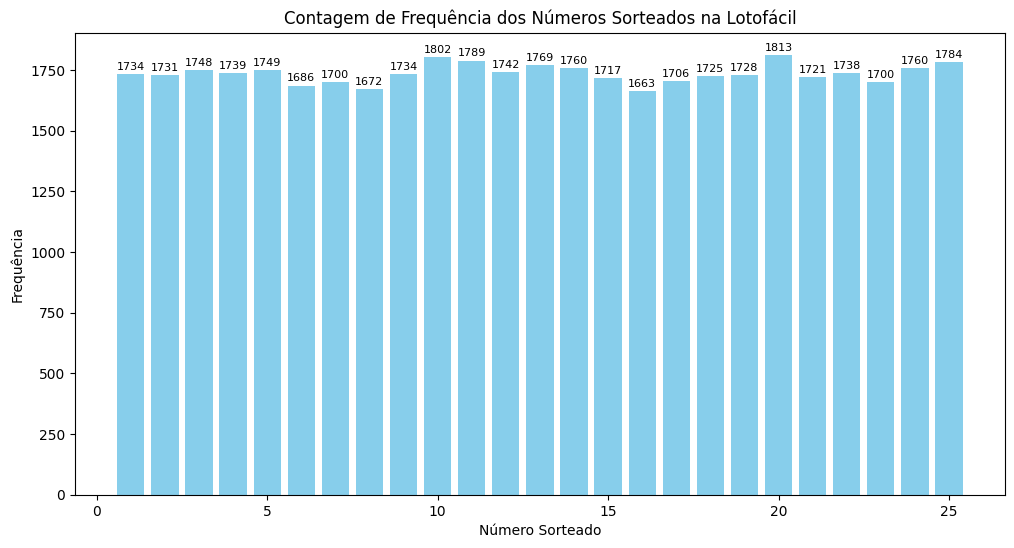

In [141]:
# Separar números e frequências ordenados
numeros, frequencias = zip(*numeros_ordenados)

# Criar um gráfico de barras com informações ao passar o mouse
plt.figure(figsize=(12, 6))
bars = plt.bar(numeros, frequencias, color='skyblue')
plt.xlabel('Número Sorteado')
plt.ylabel('Frequência')
plt.title('Contagem de Frequência dos Números Sorteados na Lotofácil')

# Adicionar informações ao passar o mouse sobre as barras
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=8)

plt.xticks(rotation=0)
plt.show()